In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:/Users/kimba/VSCode Projects/Room_Temperature_Project/03_Process/cleaned_data.csv', index_col=0)

In [2]:
import pandasql as ps

In [3]:
df.shape

(346, 7)

In [4]:

df.head()

,inside_temperature,outside_temperature,time,date,year,month,day
0,67,62,0 days 00:00:00,2021-06-25,2021,6,25
1,66,64,0 days 04:00:00,2021-06-25,2021,6,25
2,69,64,0 days 08:00:00,2021-06-25,2021,6,25
3,72,78,0 days 12:00:00,2021-06-25,2021,6,25
4,70,76,0 days 16:00:00,2021-06-25,2021,6,25


In [5]:
df.dtypes

inside_temperature      int64
outside_temperature     int64
time                   object
date                   object
year                    int64
month                   int64
day                     int64
dtype: object

In [6]:
df.groupby(['time']).describe().loc[:,['outside_temperature', 'inside_temperature']]

outside_temperature                                          \
                              count       mean       std   min    25%   50%   
time                                                                          
0 days 00:00:00                60.0  72.483333  4.575142  62.0  69.75  73.0   
0 days 04:00:00                56.0  70.767857  4.276749  62.0  68.00  72.0   
0 days 08:00:00                57.0  72.070175  4.938405  61.0  69.00  72.0   
0 days 12:00:00                58.0  83.448276  6.885460  67.0  78.25  83.0   
0 days 16:00:00                56.0  82.696429  6.972464  67.0  78.75  82.0   
0 days 20:00:00                59.0  77.966102  5.542830  65.0  74.00  77.0   

                             inside_temperature                             \
                   75%   max              count       mean       std   min   
time                                                                         
0 days 00:00:00  75.25  82.0               60.0  71.900000  2.790419  66.0   
0 days 04:00:00  73.25  80.0               56.0  70.500000  2.174229  66.0   
0 days 08:00:00  75.00  85.0               57.0  70.894737  2.143797  66.0   
0 days 12:00:00  89.75  95.0               58.0  73.620690  2.661141  68.0   
0 days 16:00:00  87.00  97.0               56.0  73.964286  3.020923  67.0   
0 days 20:00:00  81.50  91.0               59.0  73.593220  2.736211  67.0   

                                         
                  25%   50%   75%   max  
time                                     
0 days 00:00:00  70.0  72.0  74.0  80.0  
0 days 04:00:00  69.0  70.0  72.0  79.0  
0 days 08:00:00  69.0  71.0  72.0  76.0  
0 days 12:00:00  72.0  74.0  75.0  79.0  
0 days 16:00:00  72.0  74.0  76.0  81.0  
0 days 20:00:00  72.0  74.0  75.0  81.0

<AxesSubplot:xlabel='outside_temperature', ylabel='inside_temperature'>

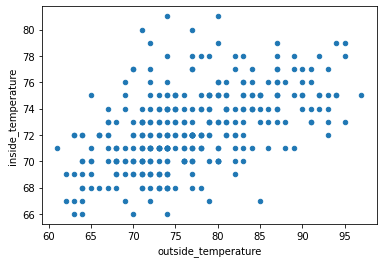

In [7]:
df.plot.scatter(x='outside_temperature', y='inside_temperature')

In [8]:
mean_outside_series = df.groupby(['time']).mean().loc[:, ['outside_temperature']]

In [9]:
mean_inside_series = df.groupby(['time']).mean().loc[:, ['inside_temperature']]

<AxesSubplot:xlabel='time'>

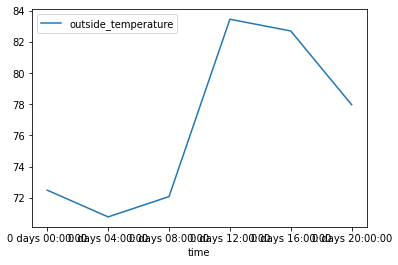

In [10]:
mean_outside_series.plot()

<AxesSubplot:xlabel='time'>

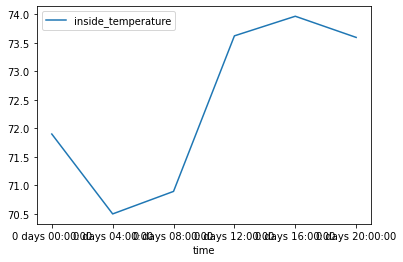

In [11]:
mean_inside_series.plot()

In [12]:
mean_temp_df = df.groupby(['time']).mean().loc[:, ['outside_temperature', 'inside_temperature']]


<AxesSubplot:xlabel='time'>

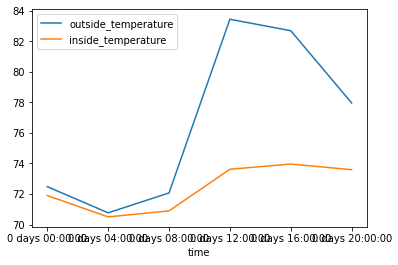

In [13]:
mean_temp_df.plot(legend=True)

In [14]:
drop_days = lambda x: x.split('days ')[1]

df['time'] = df['time'].apply(drop_days)

In [15]:
df.head(6)

,inside_temperature,outside_temperature,time,date,year,month,day
0,67,62,00:00:00,2021-06-25,2021,6,25
1,66,64,04:00:00,2021-06-25,2021,6,25
2,69,64,08:00:00,2021-06-25,2021,6,25
3,72,78,12:00:00,2021-06-25,2021,6,25
4,70,76,16:00:00,2021-06-25,2021,6,25
5,70,71,20:00:00,2021-06-25,2021,6,25


In [16]:
months = [6, 7, 8]
data = []
for x in months:
    month = df[(df['month'] == x)]
    ser = month.groupby(['time'])['outside_temperature'].mean()
    data.append(ser)

avg_outside_per_month_by_time = pd.concat(data, axis=1)
avg_outside_per_month_by_time.columns = ['june', 'july', 'august']
avg_outside_per_month_by_time

,june,july,august
time,,,
00:00:00,73.500000,72.407407,72.333333
04:00:00,71.800000,70.333333,71.041667
08:00:00,74.166667,71.961538,71.680000
12:00:00,88.000000,83.384615,82.461538
16:00:00,89.600000,82.333333,81.740741
20:00:00,82.166667,78.074074,76.884615


<AxesSubplot:xlabel='time'>

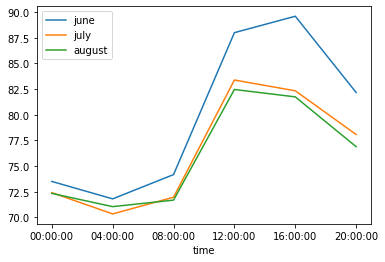

In [17]:
avg_outside_per_month_by_time.plot(legend=True)

<AxesSubplot:xlabel='outside_temperature', ylabel='inside_temperature'>

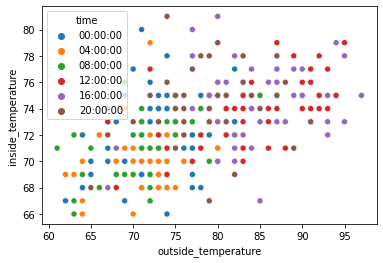

In [18]:
sns.scatterplot(data=df, x='outside_temperature', y='inside_temperature', hue='time')

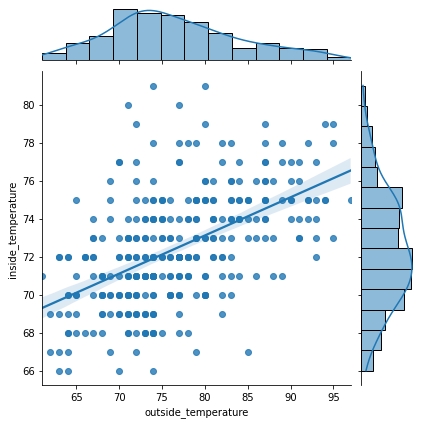

In [19]:
sns.jointplot(data=df, x='outside_temperature', y='inside_temperature', kind='reg')

In [20]:
df.corr(method='pearson').iloc[:2, :2]

,inside_temperature,outside_temperature
inside_temperature,1.000000,0.518671
outside_temperature,0.518671,1.000000


<AxesSubplot:xlabel='day'>

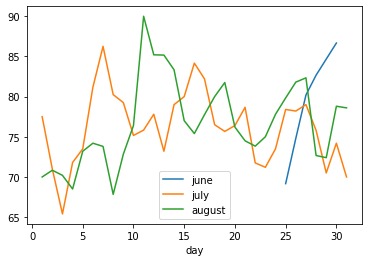

In [21]:
months = [6, 7, 8]
data = []
for x in months:
    month = df[(df['month'] == x)]
    ser = month.groupby(['day'])['outside_temperature'].mean()
    data.append(ser)

avg_outside_per_month_by_day = pd.concat(data, axis=1)
avg_outside_per_month_by_day.columns = ['june', 'july', 'august']
avg_outside_per_month_by_day

avg_outside_per_month_by_day.plot(legend=True)

<AxesSubplot:xlabel='date'>

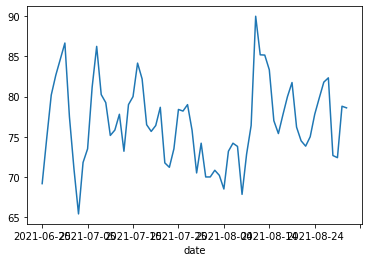

In [22]:
df.groupby(['date'])['outside_temperature'].mean().plot()

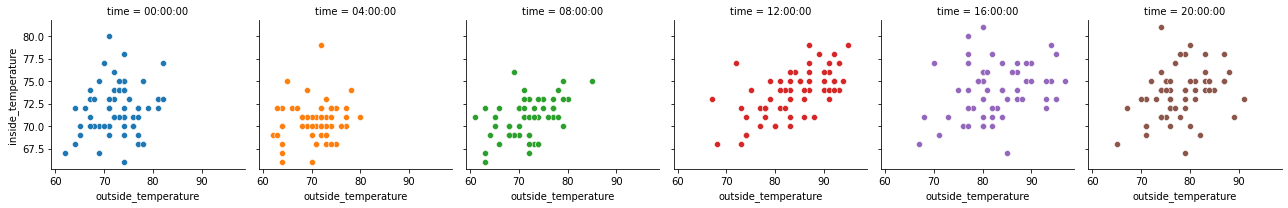

In [23]:
scatter_grid_time = sns.FacetGrid(df, col='time', hue='time')
scatter_grid_time.map(sns.scatterplot, 'outside_temperature', 'inside_temperature')

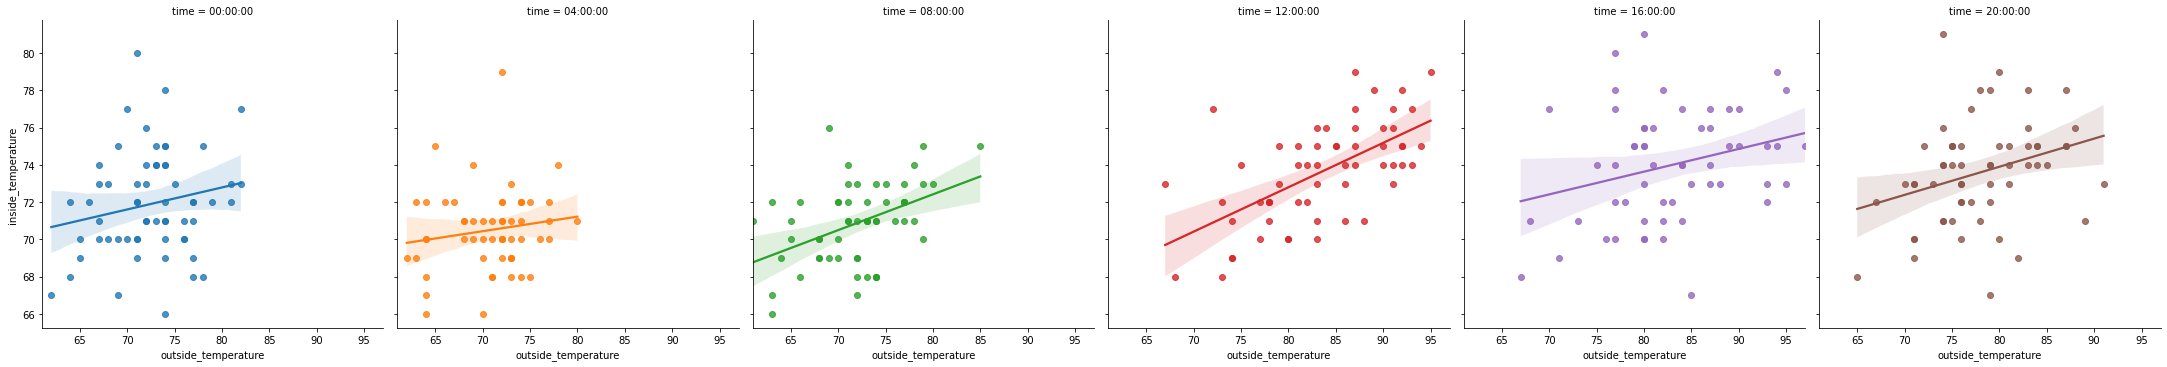

In [24]:
scatter_grid_time_with_regression = sns.lmplot(x='outside_temperature', y='inside_temperature', data=df, col='time', hue='time')
scatter_grid_time_with_regression

In [25]:
df.groupby(['time']).corr(method='pearson').iloc[1::5, 0]

time                         
00:00:00  outside_temperature    0.193700
04:00:00  outside_temperature    0.153493
08:00:00  outside_temperature    0.442629
12:00:00  outside_temperature    0.616477
16:00:00  outside_temperature    0.281742
20:00:00  outside_temperature    0.306016
Name: inside_temperature, dtype: float64

array([[<AxesSubplot:title={'center':'inside_temperature'}>]],
      dtype=object)

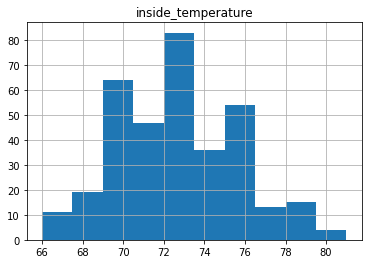

In [26]:
df.hist('inside_temperature')

array([[<AxesSubplot:title={'center':'outside_temperature'}>]],
      dtype=object)

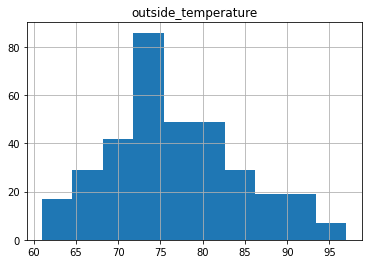

In [27]:
df.hist('outside_temperature')

<AxesSubplot:xlabel='outside_temperature', ylabel='Density'>

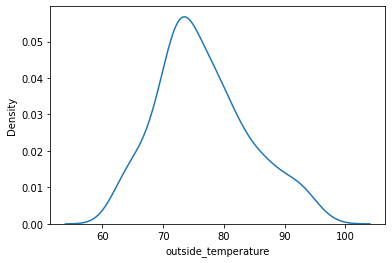

In [28]:
sns.kdeplot('outside_temperature', data=df)